<h2 align='center'> Attrition Analysis </h2>


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Attrition Dataset

In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


**Target variable is Attrition which is Binary Categorical**

#### Shape of Dataset

In [3]:
df.shape

(4410, 24)

* **Checking Information of Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Checking Null Columns

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Filling Null Values by mean and median 

In [6]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28) 
# 11.28 is the mean of TotalWorkingYears column 

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2)
# 2 is the median of NumCompaniesWorked

#### Check if all values are filled 

In [7]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

* No Null values are there now

<hr>

### Ploting Histogram

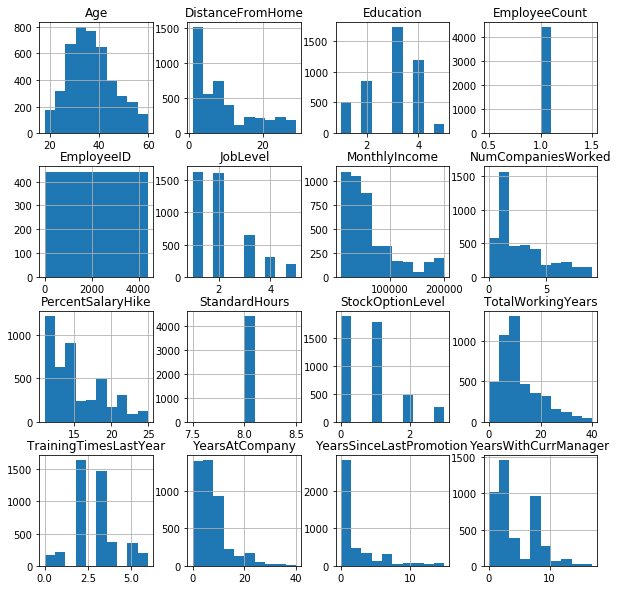

In [8]:
df.hist(figsize=(10,10))
plt.show()

### Inference from Histogram:
* Education, JobLevel, StockOptional Level are Categorical Variables which are in Encoded format
* Standard Hours, Employee Count, Employee ID are irrelevent columns

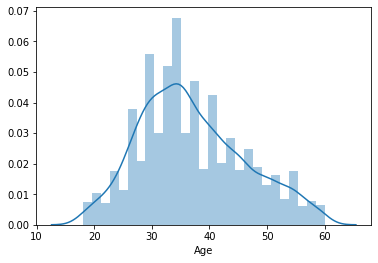

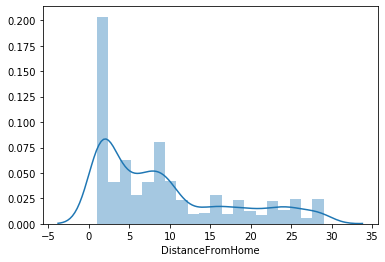

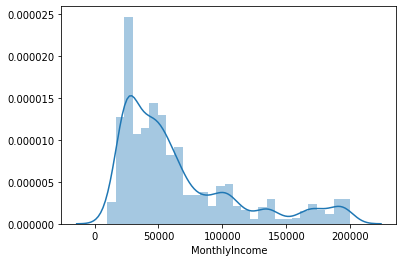

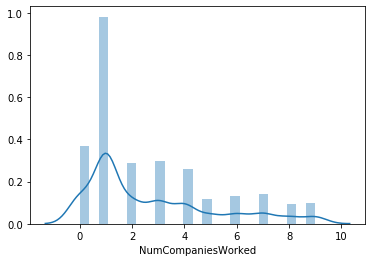

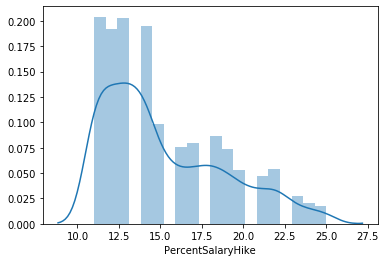

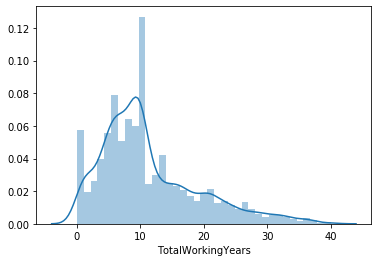

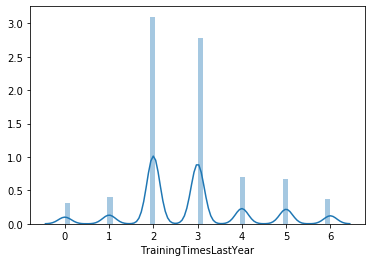

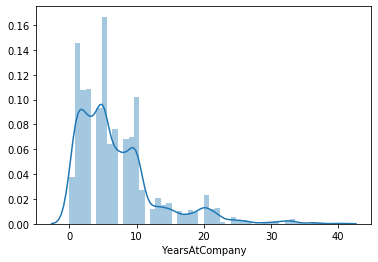

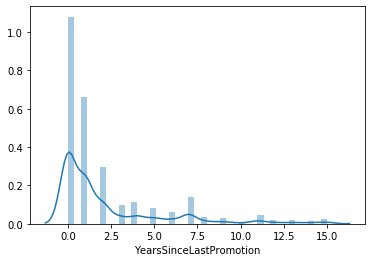

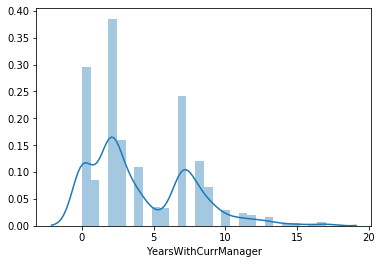

In [9]:
columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns:
    sns.distplot(df[col])
    plt.show()

### Inference from Distplot
* Age, NumCompanies Worked, PercentSalaryHike, TotalWorking Years, YearsSinceLastPromotion is Unimodal
* Distance from Home is Bimodal
* Monthly Income, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal

<hr>

### Finding Outliers using Boxplot

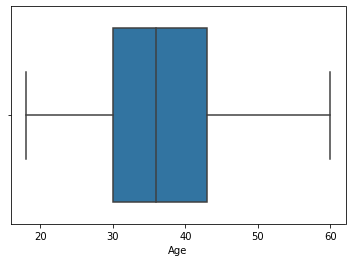

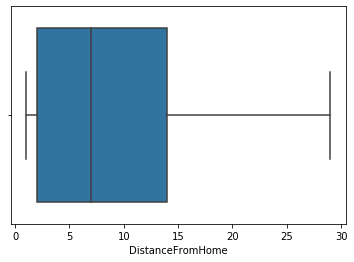

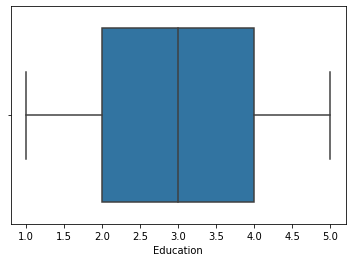

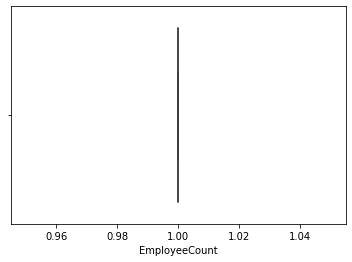

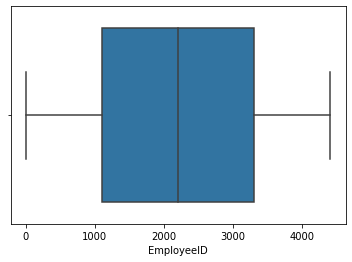

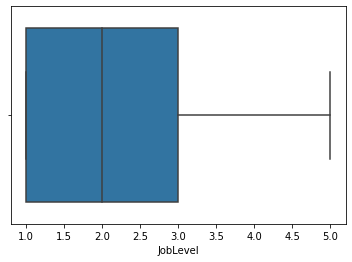

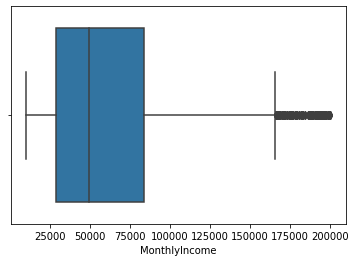

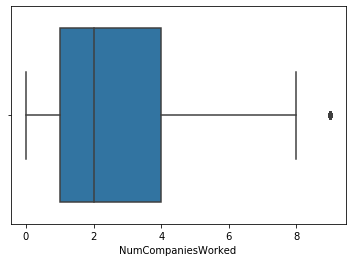

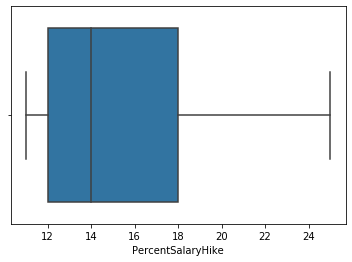

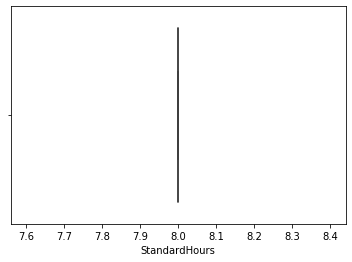

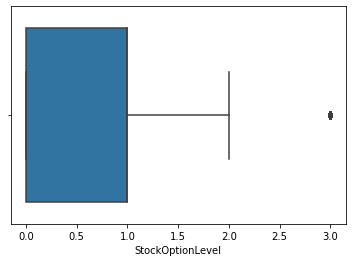

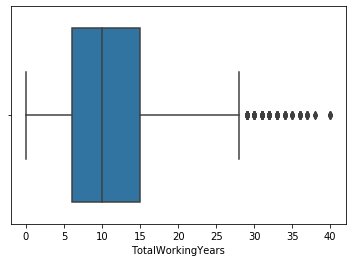

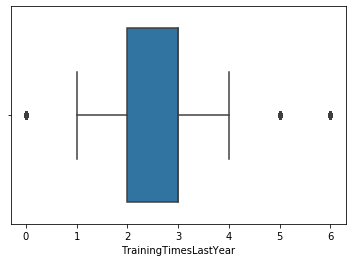

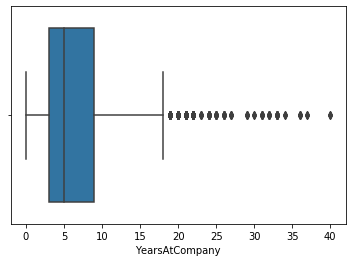

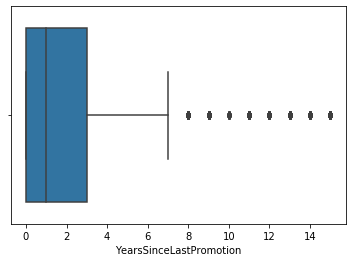

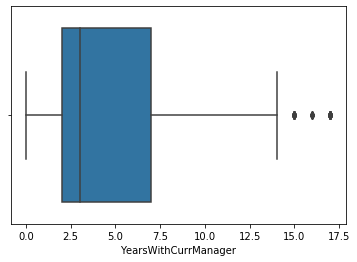

In [12]:
col = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in col:
    sns.boxplot(df[i])
    plt.show()

### Inference from BoxPlots
Ploted Box Plot for all the Continous Variable ( int and float not object type variable) 
* Age, DistanceFromHome,	Education,	EmployeeID,	JobLevel, PercentSalaryHike : **Donot have any outlier** 
* NumCompaniesWorked, StockOptionLevel has **Single Outlier** 
* MonthlyIncome has **Many Outliers**
* TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have **Moderate Outliers**
* TrainingTimesLastYear, YearsWithCurrManager : **Have Some Outliers**  
* EmployeeCount , StandardHours : Just have a line ( **Irrelevant Columns** of DataSet )
<hr>

### Converting Text Column to Categorical Form

In [13]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df['Attrition'] = lab.fit_transform(df['Attrition'])
df['BusinessTravel'] = lab.fit_transform(df['BusinessTravel'])
df['Department'] = lab.fit_transform(df['Department'])
df['Over18'] = lab.fit_transform(df['Over18'])
df['MaritalStatus'] = lab.fit_transform(df['MaritalStatus'])
df['JobRole'] = lab.fit_transform(df['JobRole'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['EducationField'] = lab.fit_transform(df['EducationField'])

In [14]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


### Droping Irrelevent Columns

In [15]:
df = df.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [16]:
df.shape

(4410, 20)

## Spliting the Dataset

In [17]:
y = df.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [18]:
x = df.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [19]:
x.shape

(4410, 19)

# Applying Decision Tree
* Target Variable is Attrition which is Binary Categorical ( 0 or 1 )

In [20]:
from sklearn import tree
from sklearn import preprocessing

In [21]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [22]:
df.shape

(4410, 20)

In [23]:
x.shape

(4410, 19)

# Train the model using Decision Tree

In [24]:
model = tree.DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predicting Score 

In [25]:
model.score(x,y)

1.0

---- Seems to be Data is Overfitted ( as accuracy is 100% )

## Applying Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [28]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

### Checking Score 

In [29]:
rf.oob_score_

0.9997732426303855

### Finding Most Relevent Column for predicting Attrition

In [30]:
a = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for feature,imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t :",imp);

Age 		 : 0.09754454830244688
BusinessTravel 		 : 0.028037214332561605
Department 		 : 0.026193782807028287
DistanceFromHome 		 : 0.0697853416003491
Education 		 : 0.04108497628209743
EducationField 		 : 0.041563647676345496
Gender 		 : 0.01848895258612967
JobLevel 		 : 0.03795987571345533
JobRole 		 : 0.05538785290645099
MaritalStatus 		 : 0.039612637475913655
MonthlyIncome 		 : 0.09461775365788226
NumCompaniesWorked 		 : 0.055557366285250806
PercentSalaryHike 		 : 0.06521924079949783
StockOptionLevel 		 : 0.03317303825580943
TotalWorkingYears 		 : 0.08511557075607994
TrainingTimesLastYear 		 : 0.044957565383245766
YearsAtCompany 		 : 0.06877645896609147
YearsSinceLastPromotion 		 : 0.04334996589571259
YearsWithCurrManager 		 : 0.0535742103176516


### Inference:
* Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany have value more than 0.05 ie, They are Important feature and affect the prediction of Attrition

## Spliting Dataset according to Important Columns

In [31]:
imp = df[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]
imp.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,51,6,131160,11,1.0,1
1,31,10,41890,23,6.0,5
2,32,17,193280,15,5.0,5
3,38,2,83210,11,13.0,8
4,32,10,23420,12,9.0,6


### Fitting Decision Tree

In [32]:
model = tree.DecisionTreeClassifier(max_depth=12)
model.fit(imp,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Creating Tree

In [33]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

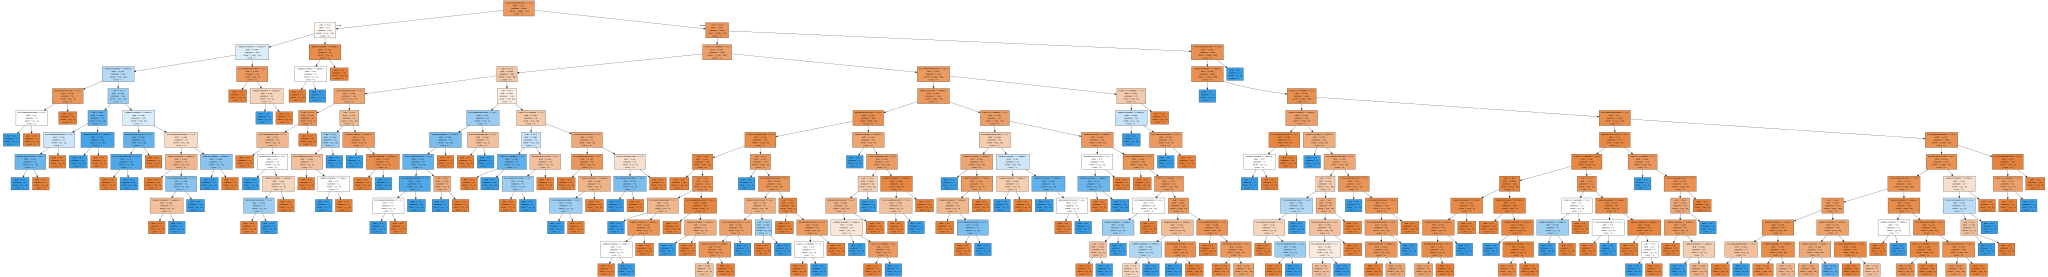

In [34]:
graph = Source(tree.export_graphviz(model, out_file=None, 
                                    feature_names=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike',
                                                   'TotalWorkingYears','YearsAtCompany'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

### Predicting Score

In [35]:
model.score(imp,y)

0.9480725623582766

## Fitting Random Forest

In [36]:
rf.fit(imp,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

### Accuracy Score 

In [37]:
rf.oob_score_

0.999546485260771

## Conclusion: 
* The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns. 
* The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)